# TRABAJO PRÁCTICO 2

### Algoritmos Evolutivos

Alumno: Leandro Bello


URL: https://github.com/manco92/Algoritmos_gen

In [423]:
# Importo librerías
import numpy as np
import matplotlib.pyplot as plt

### EJERCICIO 1

Escribir un algoritmo PSO para la maximización de la función:

$$ 
y = 2 * sin(x)-\frac{x^2}{2}
$$

En el intervalo de $0 ≤ x ≤ 4$ y que cumpla con las siguientes consignas::
* Transcribir el algoritmo en Python con los siguientes parámetros: número de partículas = 2, máximo número de iteraciones 80, coeficientes de aceleración c1 = c2 = 2, peso de inercia w = 0.7.
* Transcribir la solución óptima encontrada (dominio) y el valor objetivo óptimo (imagen).
* Indicar la URL del repositorio en donde se encuentra el algoritmo PSO.
* Graficar usando matplotlib la función objetivo y agregar un punto verde en donde el algoritmo haya encontrado el valor máximo. El gráfico debe contener etiquetas en los ejes, leyenda y un título.
* Realizar un gráfico de línea que muestre gbest en función de las iteraciones realizadas.
* Sobre el gráfico anterior superponer (con colores diferentes) 5 gráficos de línea de gbest en función de las iteraciones realizadas para ejecuciones con 4, 10, 100, 200 y 400 partículas respectivamente.
* Realizar observaciones/comentarios/conclusiones sobre los resultados obtenidos en el ítem anterior.

In [424]:
# funcion objetivo hiperboloide eliptico
def funcion_objetivo(x):
    return 2*np.sin(x)-x**2/2

In [425]:
def solve_PSO(funcion_objetivo, num_particulas, cantidad_iteraciones, c1, c2, w, limite_inf, limite_sup):

    # inicializacion
    particulas = np.random.uniform(limite_inf, limite_sup, num_particulas)  # posiciones iniciales de las particulas

    velocidades = np.zeros((num_particulas))  # inicializacion de la matriz de velocidades en cero

    # inicializacion de pbest y gbest
    pbest = particulas.copy()  # mejores posiciones personales iniciales

    fitness_pbest = np.empty(num_particulas)  # mejores fitness personales iniciales
    for i in range(num_particulas):
        fitness_pbest[i] = funcion_objetivo(particulas[i])

    gbest = pbest[np.argmin(fitness_pbest)]  # mejor posicion global inicial
    fitness_gbest = np.min(fitness_pbest)  # fitness global inicial

    g_bests = []

    # busqueda
    for iteracion in range(cantidad_iteraciones):
        for i in range(num_particulas):  # iteracion sobre cada partícula
            r1, r2 = np.random.rand(), np.random.rand()  # generacion dos numeros aleatorios

            # actualizacion de la velocidad de la particula en cada dimension
            velocidades[i] = (w * velocidades[i] + c1 * r1 * (pbest[i] - particulas[i]) + c2 * r2 * (gbest - particulas[i]))

            particulas[i] = particulas[i] + velocidades[i]  # cctualizacion de la posicion de la particula en cada dimension

            # mantenimiento de las partículas dentro de los limites
            particulas[i] = np.clip(particulas[i], limite_inf, limite_sup)

            fitness = funcion_objetivo(particulas[i])  # Evaluacion de la funcion objetivo para la nueva posicion

            # actualizacion el mejor personal
            if fitness > fitness_pbest[i]:
                fitness_pbest[i] = fitness  # actualizacion del mejor fitness personal
                pbest[i] = particulas[i].copy()  # actualizacion de la mejor posicion personal

                # actualizacion del mejor global
                if fitness > fitness_gbest:
                    fitness_gbest = fitness  # actualizacion del mejor fitness global
                    gbest = particulas[i].copy()  # actualizacion de la mejor posicion global
                    
        g_bests.append(gbest)

        # imprimir el mejor global en cada iteracion
        print(f"Iteración {iteracion + 1}: Mejor posición global {gbest}, Valor {fitness_gbest}")

    # resultado
    solucion_optima = gbest  # mejor posicion global final
    valor_optimo = fitness_gbest  # mejor fitness global final

    print("\nSolucion optima (x):", solucion_optima)
    print("Valor optimo:", valor_optimo)

    return solucion_optima, valor_optimo, g_bests

In [426]:
# parametros
num_particulas = 2  # numero de particulas
#dim = 2  # dimensiones
cantidad_iteraciones = 80  # maximo numero de iteraciones
c1 = 2.0  # componente cognitivo
c2 = 2.0  # componente social
w = 0.7  # factor de inercia
limite_inf = 0  # limite inferior de busqueda
limite_sup = 4  # limite superior de busqueda

solucion_optima, valor_optimo, g_bests = solve_PSO(funcion_objetivo, num_particulas, cantidad_iteraciones, c1, c2, w, limite_inf, limite_sup)

Iteración 1: Mejor posición global 2.561434031441691, Valor -2.1841589259153307
Iteración 2: Mejor posición global 2.561434031441691, Valor -2.1841589259153307
Iteración 3: Mejor posición global 2.561434031441691, Valor -2.1841589259153307
Iteración 4: Mejor posición global 2.561434031441691, Valor -2.1841589259153307
Iteración 5: Mejor posición global 2.561434031441691, Valor -2.1841589259153307
Iteración 6: Mejor posición global 2.561434031441691, Valor -2.1841589259153307
Iteración 7: Mejor posición global 2.561434031441691, Valor -2.1841589259153307
Iteración 8: Mejor posición global 2.561434031441691, Valor -2.1841589259153307
Iteración 9: Mejor posición global 2.561434031441691, Valor -2.1841589259153307
Iteración 10: Mejor posición global 2.561434031441691, Valor -2.1841589259153307
Iteración 11: Mejor posición global 2.561434031441691, Valor -2.1841589259153307
Iteración 12: Mejor posición global 1.0051317828287676, Valor 1.183320262786923
Iteración 13: Mejor posición global 1.

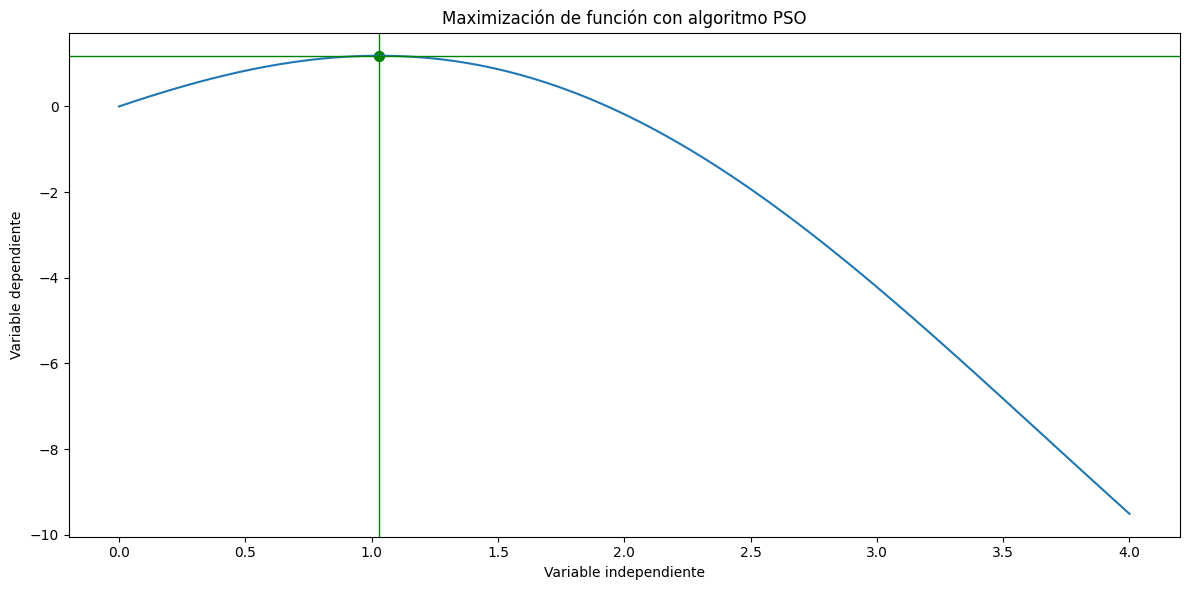

In [427]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.linspace(limite_inf, limite_sup, 100)
y = funcion_objetivo(x)

ax.plot(x, y)
ax.scatter(solucion_optima, valor_optimo, s=50, c='green')
ax.axvline(x=solucion_optima, c='green', linewidth=1)
ax.axhline(y=valor_optimo, c='green', linewidth=1)
ax.set_title('Maximización de función con algoritmo PSO')
ax.set_xlabel('Variable independiente')
ax.set_ylabel('Variable dependiente')
plt.tight_layout()
plt.show()

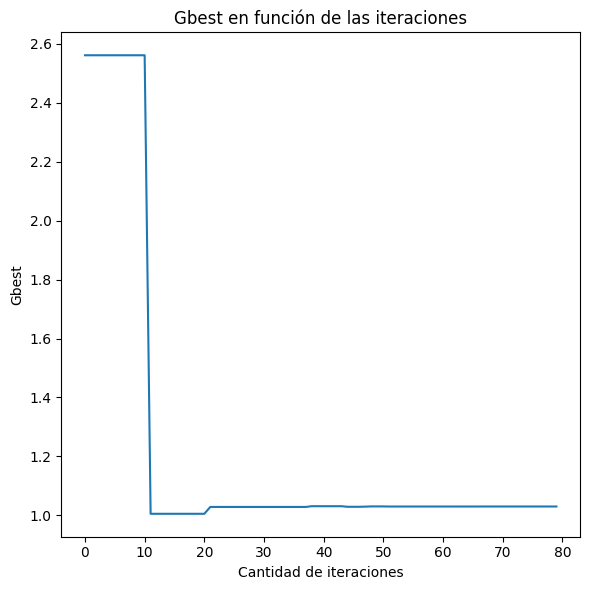

In [428]:
fig, ax = plt.subplots(figsize=(6,6))

x = np.arange(cantidad_iteraciones)
y = g_bests

ax.plot(x, y)
ax.set_title('Gbest en función de las iteraciones')
ax.set_xlabel('Cantidad de iteraciones')
ax.set_ylabel('Gbest')
plt.tight_layout()
plt.show()

#### Con más partículas

In [429]:
all_gbests = []

for num_particulas in [2, 4, 10, 100, 200, 400]:

    solucion_optima, valor_optimo, g_bests = solve_PSO(funcion_objetivo, num_particulas, cantidad_iteraciones, c1, c2, w, limite_inf, limite_sup)
    all_gbests.append(g_bests)

Iteración 1: Mejor posición global 2.7041033747420817, Valor -2.80875443901947
Iteración 2: Mejor posición global 2.7041033747420817, Valor -2.80875443901947
Iteración 3: Mejor posición global 2.7041033747420817, Valor -2.80875443901947
Iteración 4: Mejor posición global 2.7041033747420817, Valor -2.80875443901947
Iteración 5: Mejor posición global 2.7041033747420817, Valor -2.80875443901947
Iteración 6: Mejor posición global 2.7041033747420817, Valor -2.80875443901947
Iteración 7: Mejor posición global 2.7041033747420817, Valor -2.80875443901947
Iteración 8: Mejor posición global 2.7041033747420817, Valor -2.80875443901947
Iteración 9: Mejor posición global 2.7041033747420817, Valor -2.80875443901947
Iteración 10: Mejor posición global 2.7041033747420817, Valor -2.80875443901947
Iteración 11: Mejor posición global 2.7041033747420817, Valor -2.80875443901947
Iteración 12: Mejor posición global 2.7041033747420817, Valor -2.80875443901947
Iteración 13: Mejor posición global 2.70410337474

Iteración 51: Mejor posición global 1.029866490982029, Valor 1.1841480025558853
Iteración 52: Mejor posición global 1.029866490982029, Valor 1.1841480025558853
Iteración 53: Mejor posición global 1.029866490982029, Valor 1.1841480025558853
Iteración 54: Mejor posición global 1.029866490982029, Valor 1.1841480025558853
Iteración 55: Mejor posición global 1.029866490982029, Valor 1.1841480025558853
Iteración 56: Mejor posición global 1.029866490982029, Valor 1.1841480025558853
Iteración 57: Mejor posición global 1.029866490982029, Valor 1.1841480025558853
Iteración 58: Mejor posición global 1.029866490982029, Valor 1.1841480025558853
Iteración 59: Mejor posición global 1.029866490982029, Valor 1.1841480025558853
Iteración 60: Mejor posición global 1.029866490982029, Valor 1.1841480025558853
Iteración 61: Mejor posición global 1.029866490982029, Valor 1.1841480025558853
Iteración 62: Mejor posición global 1.029866490982029, Valor 1.1841480025558853
Iteración 63: Mejor posición global 1.02

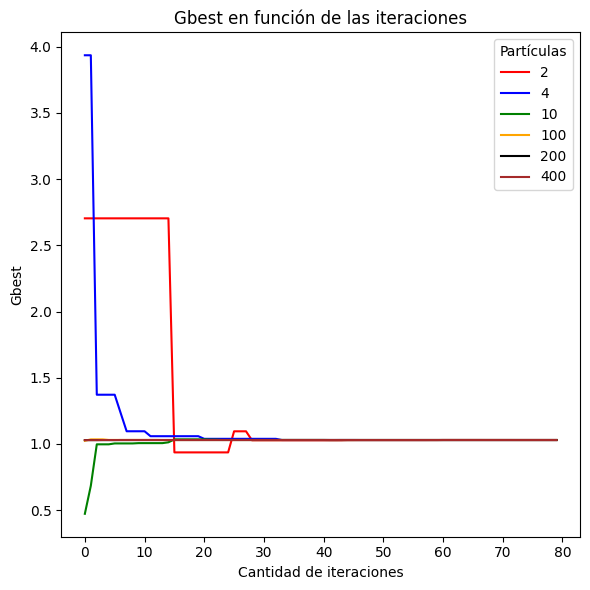

In [430]:
color = ['red', 'blue', 'green', 'orange', 'black', 'brown']

fig, ax = plt.subplots(figsize=(6,6))

for i,particulas in enumerate([2, 4, 10, 100, 200, 400]):

    x = np.arange(cantidad_iteraciones)
    y = all_gbests[i]

    ax.plot(x, y, color=color[i], label=particulas)

ax.set_title('Gbest en función de las iteraciones')
ax.set_xlabel('Cantidad de iteraciones')
ax.set_ylabel('Gbest')

plt.tight_layout()
plt.legend(title='Partículas')
plt.show()

Lo que se puede ver es que, si bien todos convergieron al valor máximo, a medida que se fueron agregando más partículas, 
el valor objetivo convergía con mayor rapidez. El que más iteraciones requirió para alcanzar el valor máximo fue el de 2 partículas (5 iteraciones), seguido del de 4 partículas (3 iteraciones), luego el de 10 (1 iteración) y para los 100, 200 y 400 partículas, solo necesitaron de 1 iteración.

### EJERCICIO 2

Escribir un algoritmo PSO para la maximización de la función:

$$ 
y = sin(x)+sin(x^2)
$$

En el intervalo de $0 ≤ x ≤ 10$ y que cumpla con las siguientes consignas:
* Transcribir el algoritmo en Python con los siguientes parámetros: número de partículas = 2, máximo número de iteraciones = 30, coeficientes de aceleración c1 = c2 = 1.49, peso de inercia w = 0.5.
* Indicar la URL del repositorio en donde se encuentra el algoritmo PSO.
* Graficar usando matplotlib la función objetivo y agregar un punto negro en donde el algoritmo haya encontrado el valor máximo. El gráfico debe contener etiquetas en los ejes, leyenda y un título.
* Realizar un gráfico de línea que muestre gbest en función de las iteraciones realizadas.
* Transcribir la solución óptima encontrada (dominio) y el valor objetivo óptimo (imagen).
* Incrementar el número de partículas a 4, ejecutar la rutina, transcribir la solución óptima encontrada, transcribir el valor objetivo óptimo y realizar nuevamente los gráficos solicitados en C y D.
* Incrementar el número de partículas a 6, ejecutar la rutina, transcribir la solución óptima encontrada, transcribir el valor objetivo óptimo y realizar nuevamente los gráficos solicitados en C y D. 
* Incrementar el número de partículas a 10, ejecutar la rutina, transcribir la solución óptima encontrada, transcribir el valor objetivo óptimo y realizar nuevamente los gráficos solicitados en C y D.
* Realizar observaciones/comentarios/conclusiones sobre los resultados obtenidos.

In [467]:
# funcion objetivo hiperboloide eliptico
def funcion_objetivo(x):
    return np.sin(x)+np.sin(x**2)

In [468]:
def solve_PSO(funcion_objetivo, num_particulas, cantidad_iteraciones, c1, c2, w, limite_inf, limite_sup):

    # inicializacion
    particulas = np.random.uniform(limite_inf, limite_sup, num_particulas)  # posiciones iniciales de las particulas

    velocidades = np.zeros((num_particulas))  # inicializacion de la matriz de velocidades en cero

    # inicializacion de pbest y gbest
    pbest = particulas.copy()  # mejores posiciones personales iniciales

    fitness_pbest = np.empty(num_particulas)  # mejores fitness personales iniciales
    for i in range(num_particulas):
        fitness_pbest[i] = funcion_objetivo(particulas[i])

    gbest = pbest[np.argmin(fitness_pbest)]  # mejor posicion global inicial
    fitness_gbest = np.min(fitness_pbest)  # fitness global inicial

    g_bests = []

    # busqueda
    for iteracion in range(cantidad_iteraciones):
        for i in range(num_particulas):  # iteracion sobre cada partícula
            r1, r2 = np.random.rand(), np.random.rand()  # generacion dos numeros aleatorios

            # actualizacion de la velocidad de la particula en cada dimension
            velocidades[i] = (w * velocidades[i] + c1 * r1 * (pbest[i] - particulas[i]) + c2 * r2 * (gbest - particulas[i]))

            particulas[i] = particulas[i] + velocidades[i]  # cctualizacion de la posicion de la particula en cada dimension

            # mantenimiento de las partículas dentro de los limites
            particulas[i] = np.clip(particulas[i], limite_inf, limite_sup)

            fitness = funcion_objetivo(particulas[i])  # Evaluacion de la funcion objetivo para la nueva posicion

            # actualizacion el mejor personal
            if fitness > fitness_pbest[i]:
                fitness_pbest[i] = fitness  # actualizacion del mejor fitness personal
                pbest[i] = particulas[i].copy()  # actualizacion de la mejor posicion personal

                # actualizacion del mejor global
                if fitness > fitness_gbest:
                    fitness_gbest = fitness  # actualizacion del mejor fitness global
                    gbest = particulas[i].copy()  # actualizacion de la mejor posicion global
                    
        g_bests.append(gbest)

        # imprimir el mejor global en cada iteracion
        print(f"Iteración {iteracion + 1}: Mejor posición global {gbest}, Valor {fitness_gbest}")

    # resultado
    solucion_optima = gbest  # mejor posicion global final
    valor_optimo = fitness_gbest  # mejor fitness global final

    print("\nSolucion optima (x):", solucion_optima)
    print("Valor optimo:", valor_optimo)

    return solucion_optima, valor_optimo, g_bests

#### Con 2 partículas

In [469]:
# parametros
num_particulas = 2  # numero de particulas
cantidad_iteraciones = 30  # maximo numero de iteraciones
c1 = 1.49  # componente cognitivo
c2 = 1.49  # componente social
w = 0.5  # factor de inercia
limite_inf = 0  # limite inferior de busqueda
limite_sup = 10  # limite superior de busqueda

solucion_optima, valor_optimo, g_bests = solve_PSO(funcion_objetivo, num_particulas, cantidad_iteraciones, c1, c2, w, limite_inf, limite_sup)

Iteración 1: Mejor posición global 6.51593363527382, Valor -0.7682946103484992
Iteración 2: Mejor posición global 6.51593363527382, Valor -0.7682946103484992
Iteración 3: Mejor posición global 6.51593363527382, Valor -0.7682946103484992
Iteración 4: Mejor posición global 6.51593363527382, Valor -0.7682946103484992
Iteración 5: Mejor posición global 6.51593363527382, Valor -0.7682946103484992
Iteración 6: Mejor posición global 6.51593363527382, Valor -0.7682946103484992
Iteración 7: Mejor posición global 6.51593363527382, Valor -0.7682946103484992
Iteración 8: Mejor posición global 6.51593363527382, Valor -0.7682946103484992
Iteración 9: Mejor posición global 6.51593363527382, Valor -0.7682946103484992
Iteración 10: Mejor posición global 6.51593363527382, Valor -0.7682946103484992
Iteración 11: Mejor posición global 6.51593363527382, Valor -0.7682946103484992
Iteración 12: Mejor posición global 6.51593363527382, Valor -0.7682946103484992
Iteración 13: Mejor posición global 6.51593363527

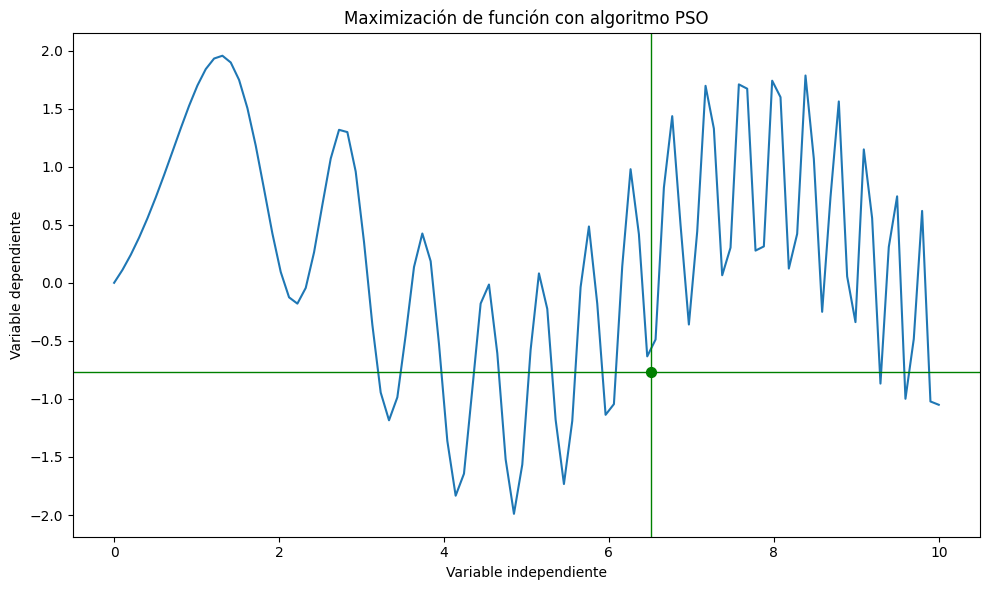

In [470]:
fig, ax = plt.subplots(figsize=(10,6))

x = np.linspace(limite_inf, limite_sup, 100)
y = funcion_objetivo(x)

ax.plot(x, y)
ax.scatter(solucion_optima, valor_optimo, s=50, c='green')
ax.axvline(x=solucion_optima, c='green', linewidth=1)
ax.axhline(y=valor_optimo, c='green', linewidth=1)
ax.set_title('Maximización de función con algoritmo PSO')
ax.set_xlabel('Variable independiente')
ax.set_ylabel('Variable dependiente')
plt.tight_layout()
plt.show()

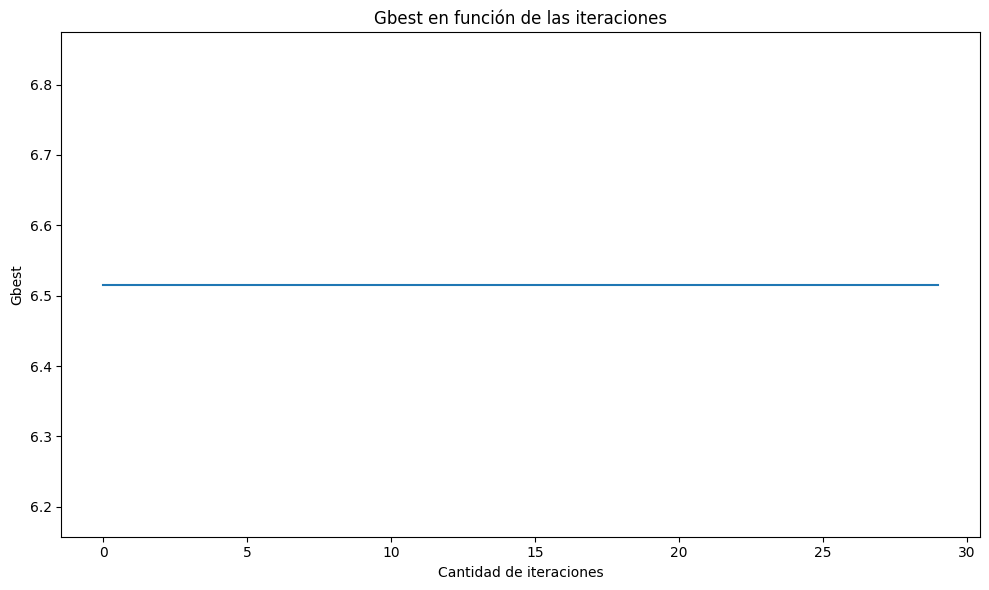

In [471]:
fig, ax = plt.subplots(figsize=(10,6))

x = np.arange(cantidad_iteraciones)
y = g_bests

ax.plot(x, y)
ax.set_title('Gbest en función de las iteraciones')
ax.set_xlabel('Cantidad de iteraciones')
ax.set_ylabel('Gbest')
plt.tight_layout()
plt.show()

#### Con 4 partículas

In [472]:
# parametros
num_particulas = 4  # numero de particulas
cantidad_iteraciones = 30  # maximo numero de iteraciones
c1 = 1.49  # componente cognitivo
c2 = 1.49  # componente social
w = 0.5  # factor de inercia
limite_inf = 0  # limite inferior de busqueda
limite_sup = 10  # limite superior de busqueda

solucion_optima, valor_optimo, g_bests = solve_PSO(funcion_objetivo, num_particulas, cantidad_iteraciones, c1, c2, w, limite_inf, limite_sup)

Iteración 1: Mejor posición global 9.094499363899265, Valor 1.180837376271547
Iteración 2: Mejor posición global 9.118373630030703, Valor 1.295863301550468
Iteración 3: Mejor posición global 7.61678082880788, Valor 1.966584586717199
Iteración 4: Mejor posición global 7.61678082880788, Valor 1.966584586717199
Iteración 5: Mejor posición global 7.61678082880788, Valor 1.966584586717199
Iteración 6: Mejor posición global 7.61678082880788, Valor 1.966584586717199
Iteración 7: Mejor posición global 8.016835226052132, Valor 1.9779368526285899
Iteración 8: Mejor posición global 8.016835226052132, Valor 1.9779368526285899
Iteración 9: Mejor posición global 8.016835226052132, Valor 1.9779368526285899
Iteración 10: Mejor posición global 8.016835226052132, Valor 1.9779368526285899
Iteración 11: Mejor posición global 8.016835226052132, Valor 1.9779368526285899
Iteración 12: Mejor posición global 8.02829464151312, Valor 1.9835525492730806
Iteración 13: Mejor posición global 8.02829464151312, Valor 

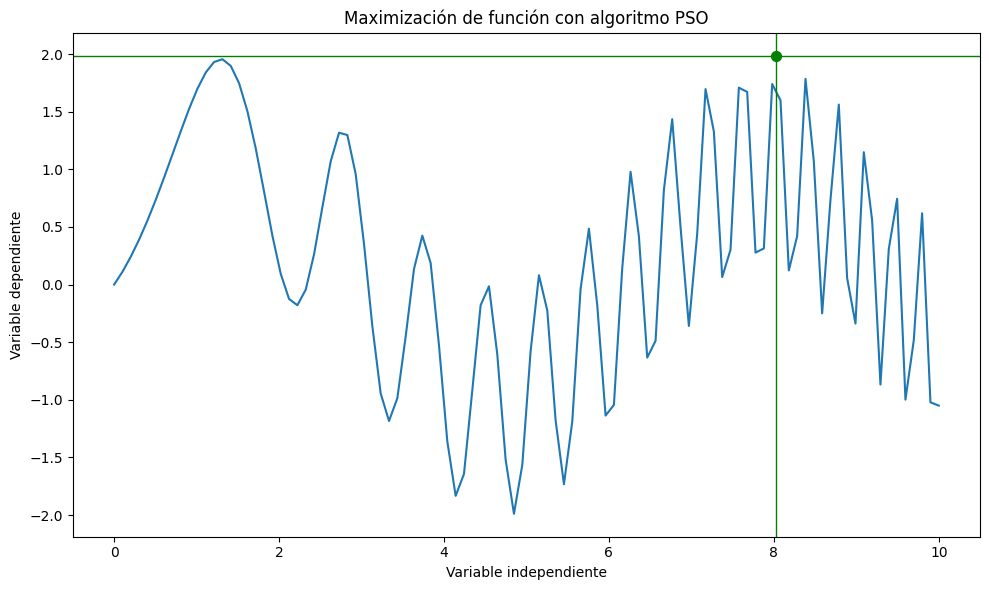

In [473]:
fig, ax = plt.subplots(figsize=(10,6))

x = np.linspace(limite_inf, limite_sup, 100)
y = funcion_objetivo(x)

ax.plot(x, y)
ax.scatter(solucion_optima, valor_optimo, s=50, c='green')
ax.axvline(x=solucion_optima, c='green', linewidth=1)
ax.axhline(y=valor_optimo, c='green', linewidth=1)
ax.set_title('Maximización de función con algoritmo PSO')
ax.set_xlabel('Variable independiente')
ax.set_ylabel('Variable dependiente')
plt.tight_layout()
plt.show()

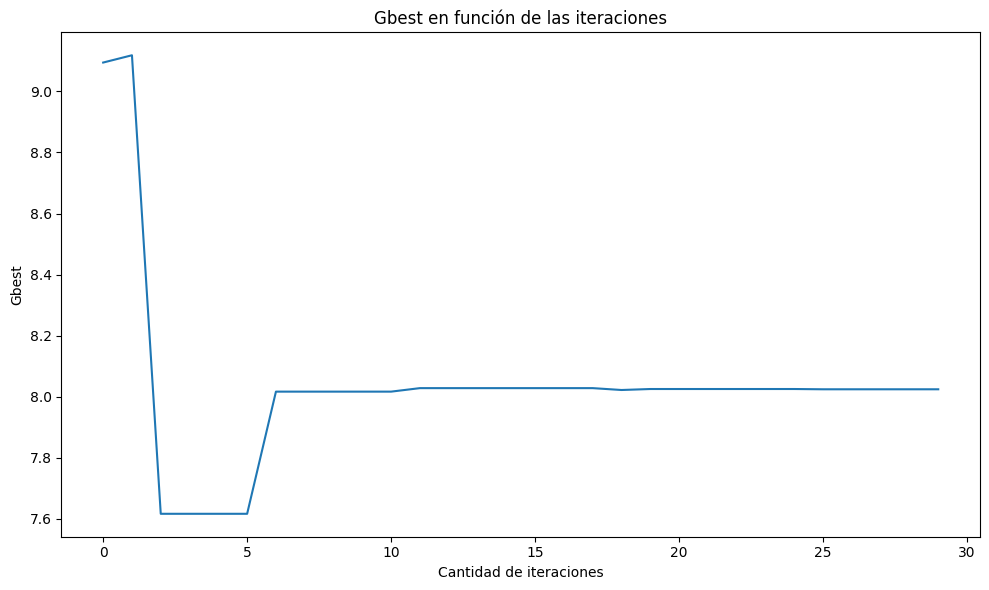

In [474]:
fig, ax = plt.subplots(figsize=(10,6))

x = np.arange(cantidad_iteraciones)
y = g_bests

ax.plot(x, y)
ax.set_title('Gbest en función de las iteraciones')
ax.set_xlabel('Cantidad de iteraciones')
ax.set_ylabel('Gbest')
plt.tight_layout()
plt.show()

#### Con 6 partículas

In [475]:
# parametros
num_particulas = 6  # numero de particulas
cantidad_iteraciones = 30  # maximo numero de iteraciones
c1 = 1.49  # componente cognitivo
c2 = 1.49  # componente social
w = 0.5  # factor de inercia
limite_inf = 0  # limite inferior de busqueda
limite_sup = 10  # limite superior de busqueda

solucion_optima, valor_optimo, g_bests = solve_PSO(funcion_objetivo, num_particulas, cantidad_iteraciones, c1, c2, w, limite_inf, limite_sup)

Iteración 1: Mejor posición global 0.5203314898328146, Valor 0.7646170201288318
Iteración 2: Mejor posición global 1.2153353612930071, Valor 1.9330942599905843
Iteración 3: Mejor posición global 1.2153353612930071, Valor 1.9330942599905843
Iteración 4: Mejor posición global 1.2153353612930071, Valor 1.9330942599905843
Iteración 5: Mejor posición global 1.2153353612930071, Valor 1.9330942599905843
Iteración 6: Mejor posición global 1.2153353612930071, Valor 1.9330942599905843
Iteración 7: Mejor posición global 1.2667444503209953, Valor 1.953558545539272
Iteración 8: Mejor posición global 1.3094304553356553, Valor 1.9557148323917897
Iteración 9: Mejor posición global 1.3094304553356553, Valor 1.9557148323917897
Iteración 10: Mejor posición global 1.299341688089008, Valor 1.9564875722191717
Iteración 11: Mejor posición global 1.299341688089008, Valor 1.9564875722191717
Iteración 12: Mejor posición global 1.299341688089008, Valor 1.9564875722191717
Iteración 13: Mejor posición global 1.299

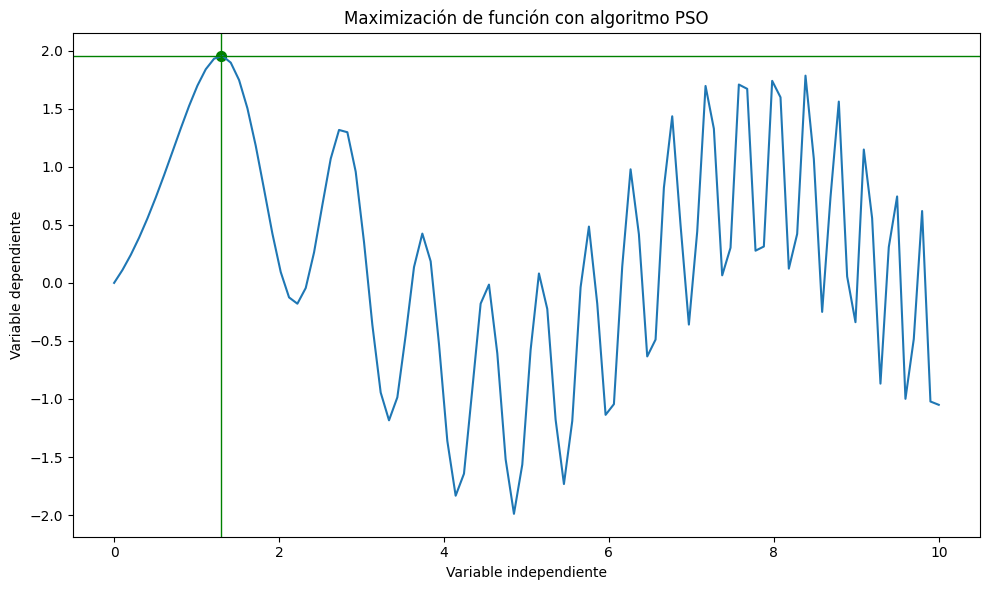

In [476]:
fig, ax = plt.subplots(figsize=(10,6))

x = np.linspace(limite_inf, limite_sup, 100)
y = funcion_objetivo(x)

ax.plot(x, y)
ax.scatter(solucion_optima, valor_optimo, s=50, c='green')
ax.axvline(x=solucion_optima, c='green', linewidth=1)
ax.axhline(y=valor_optimo, c='green', linewidth=1)
ax.set_title('Maximización de función con algoritmo PSO')
ax.set_xlabel('Variable independiente')
ax.set_ylabel('Variable dependiente')
plt.tight_layout()
plt.show()

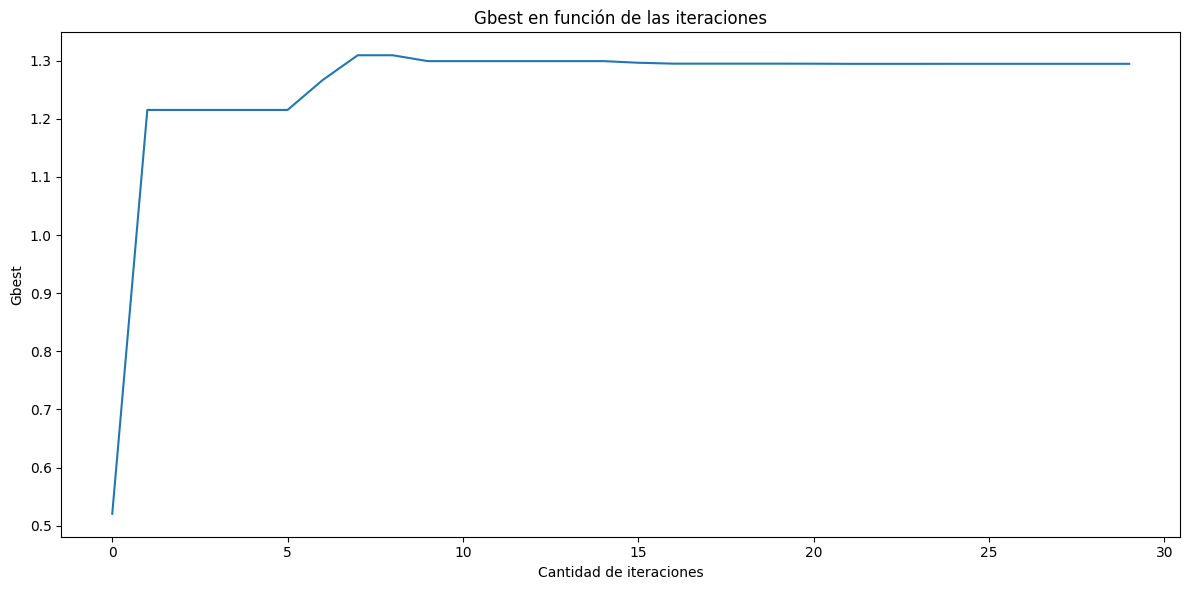

In [477]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(cantidad_iteraciones)
y = g_bests

ax.plot(x, y)
ax.set_title('Gbest en función de las iteraciones')
ax.set_xlabel('Cantidad de iteraciones')
ax.set_ylabel('Gbest')
plt.tight_layout()
plt.show()

#### Con 10 partículas

In [478]:
# parametros
num_particulas = 10  # numero de particulas
cantidad_iteraciones = 30  # maximo numero de iteraciones
c1 = 1.49  # componente cognitivo
c2 = 1.49  # componente social
w = 0.5  # factor de inercia
limite_inf = 0  # limite inferior de busqueda
limite_sup = 10  # limite superior de busqueda

solucion_optima, valor_optimo, g_bests = solve_PSO(funcion_objetivo, num_particulas, cantidad_iteraciones, c1, c2, w, limite_inf, limite_sup)

Iteración 1: Mejor posición global 1.5184462798819833, Valor 1.7405394050135388
Iteración 2: Mejor posición global 1.5184462798819833, Valor 1.7405394050135388
Iteración 3: Mejor posición global 1.5184462798819833, Valor 1.7405394050135388
Iteración 4: Mejor posición global 1.5184462798819833, Valor 1.7405394050135388
Iteración 5: Mejor posición global 1.2725536765884482, Valor 1.9546737669180514
Iteración 6: Mejor posición global 1.2725536765884482, Valor 1.9546737669180514
Iteración 7: Mejor posición global 1.2738976397503343, Valor 1.9548957176843018
Iteración 8: Mejor posición global 1.2983349910625934, Valor 1.956520304313674
Iteración 9: Mejor posición global 1.2983349910625934, Valor 1.956520304313674
Iteración 10: Mejor posición global 1.2983349910625934, Valor 1.956520304313674
Iteración 11: Mejor posición global 1.2983349910625934, Valor 1.956520304313674
Iteración 12: Mejor posición global 1.2940454201784444, Valor 1.9565703159938164
Iteración 13: Mejor posición global 1.294

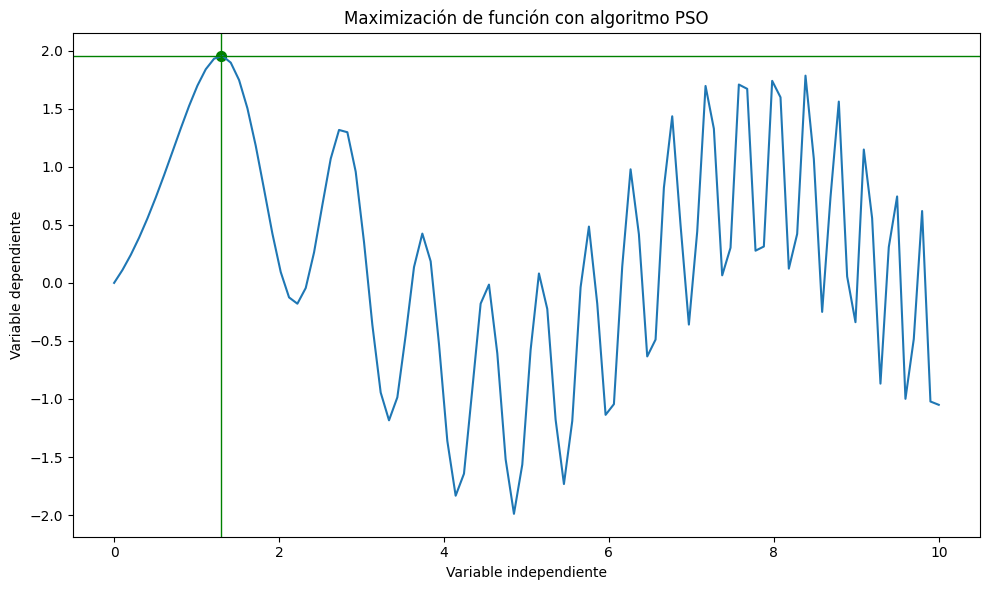

In [479]:
fig, ax = plt.subplots(figsize=(10,6))

x = np.linspace(limite_inf, limite_sup, 100)
y = funcion_objetivo(x)

ax.plot(x, y)
ax.scatter(solucion_optima, valor_optimo, s=50, c='green')
ax.axvline(x=solucion_optima, c='green', linewidth=1)
ax.axhline(y=valor_optimo, c='green', linewidth=1)
ax.set_title('Maximización de función con algoritmo PSO')
ax.set_xlabel('Variable independiente')
ax.set_ylabel('Variable dependiente')
plt.tight_layout()
plt.show()

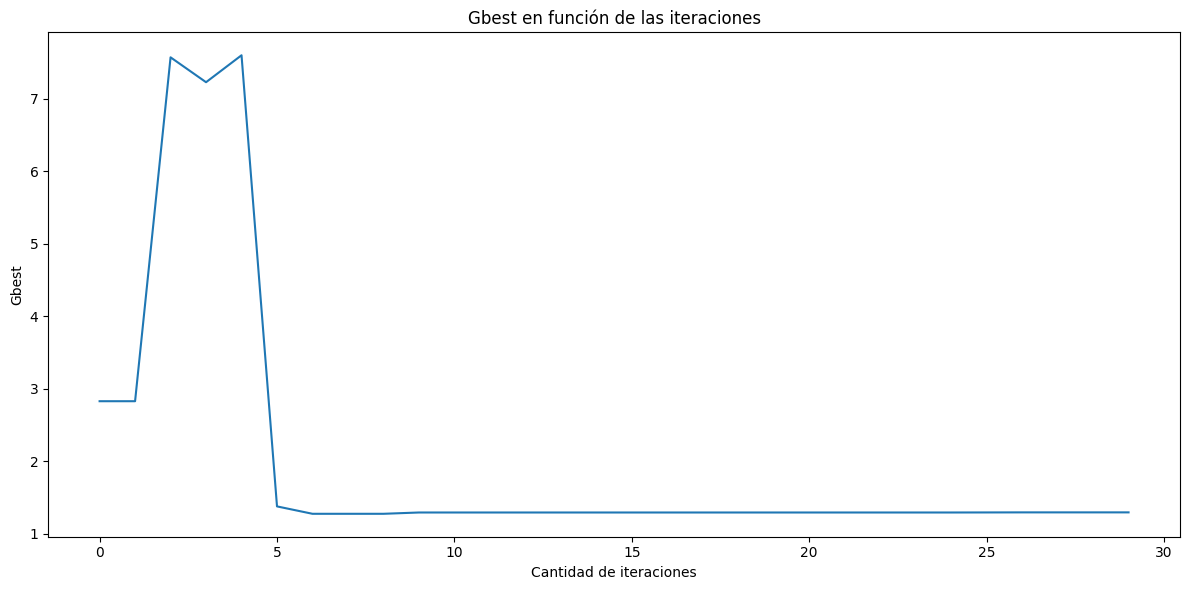

In [444]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(cantidad_iteraciones)
y = g_bests

ax.plot(x, y)
ax.set_title('Gbest en función de las iteraciones')
ax.set_xlabel('Cantidad de iteraciones')
ax.set_ylabel('Gbest')
plt.tight_layout()
plt.show()

Cuando se varía el número de partículas, se está permitiendo una exploración más amplia de posible soluciones. Cuando se optó hasta 6 partículas, el algoritmo eligió un máximo local. Sin embargo, cuando se aumentó el número de partículas, el algoritm halló el máximo global.

### EJERCICIO 3

Dada la siguiente función perteneciente a un paraboloide elíptico de la forma:

$$ 
f(x,y) = (x-a)^2+(y+b)^2
$$

donde, las constantes a y b son valores reales ingresados por el usuario a través de la consola, con intervalos de:

$$
−100 ≤ x ≤ 100 \\
−100 ≤ y ≤ 100 \\
−50 ≤ a ≤ 50 \\
−50 ≤ b ≤ 50
$$

escribir en Python un algoritmo PSO para la minimización de la función $f(x,y)$ que cumpla con las siguientes consignas:
* Transcribir el algoritmo utilizando los siguientes parámetros: número de partículas = 20, máximo número de iteraciones $= 10$, coeficientes de
aceleración $c1 = c2 = 2$, peso de inercia $w = 0.7$.
* Indicar la URL del repositorio en donde se encuentra el algoritmo PSO.
* Graficar usando matplotlib la función objetivo $f(x, y)$ y agregar un punto rojo en donde el algoritmo haya encontrado el valor mínimo. El gráfico debe contener etiquetas en los ejes, leyenda y un título.
* Realizar un gráfico de línea que muestre gbest en función de las iteraciones realizadas.
* Transcribir la solución óptima encontrada (dominio) y el valor objetivo óptimo (imagen).
* Establecer el coeficiente de inercia $w$ en $0$, ejecutar el algoritmo y realizar observaciones/comentarios/conclusiones sobre los resultados observados.
* Reescribir el algoritmo PSO para que cumpla nuevamente con los ítems A hasta F pero usando la biblioteca pyswarm (from pyswarm import pso).
* Realizar observaciones/comentarios/conclusiones comparando los resultados obtenidos sin pyswarm y con pyswarm.

In [480]:
# funcion objetivo hiperboloide eliptico
def funcion_objetivo(a, b, x, y):
    return (x-a)**2+(y+b)**2

In [481]:
def solve_PSO(funcion_objetivo, num_particulas, dim, cantidad_iteraciones, c1, c2, w, limite_inf, limite_sup, input_a, input_b):

    # inicializacion
    particulas = np.random.uniform(limite_inf, limite_sup, (num_particulas, dim))  # posiciones iniciales de las particulas

    velocidades = np.zeros((num_particulas, dim))  # inicializacion de la matriz de velocidades en cero

    # inicializacion de pbest y gbest
    pbest = particulas.copy()  # mejores posiciones personales iniciales

    fitness_pbest = np.empty(num_particulas)  # mejores fitness personales iniciales
    for i in range(num_particulas):
        fitness_pbest[i] = funcion_objetivo(input_a, input_b, particulas[i][0], particulas[i][1])

    gbest = pbest[np.argmin(fitness_pbest)]  # mejor posicion global inicial
    fitness_gbest = np.min(fitness_pbest)  # fitness global inicial

    g_bests = []

    # busqueda
    for iteracion in range(cantidad_iteraciones):
        for i in range(num_particulas):  # iteracion sobre cada partícula
            r1, r2 = np.random.rand(), np.random.rand()  # generacion dos numeros aleatorios

            # actualizacion de la velocidad de la particula en cada dimension
            for d in range(dim):
                velocidades[i][d] = (w * velocidades[i][d] + c1 * r1 * (pbest[i][d] - particulas[i][d]) + c2 * r2 * (gbest[d] - particulas[i][d]))

            for d in range(dim):
                particulas[i][d] = particulas[i][d] + velocidades[i][d]  # cctualizacion de la posicion de la particula en cada dimension

                # mantenimiento de las partículas dentro de los limites
                particulas[i][d] = np.clip(particulas[i][d], limite_inf, limite_sup)

            fitness = funcion_objetivo(input_a, input_b, particulas[i][0], particulas[i][1])  # Evaluacion de la funcion objetivo para la nueva posicion

            # actualizacion el mejor personal
            if fitness < fitness_pbest[i]:
                fitness_pbest[i] = fitness  # actualizacion del mejor fitness personal
                pbest[i] = particulas[i].copy()  # actualizacion de la mejor posicion personal

                # actualizacion del mejor global
                if fitness < fitness_gbest:
                    fitness_gbest = fitness  # actualizacion del mejor fitness global
                    gbest = particulas[i].copy()  # actualizacion de la mejor posicion global

        g_bests.append(gbest)

        # imprimir el mejor global en cada iteracion
        print(f"Iteración {iteracion + 1}: Mejor posición global {gbest}, Valor {fitness_gbest}")

    # resultado
    solucion_optima = gbest  # mejor posicion global final
    valor_optimo = fitness_gbest  # mejor fitness global final

    print("\nSolucion optima (x, y):", solucion_optima)
    print("Valor optimo:", valor_optimo)

    return solucion_optima, valor_optimo, g_bests

In [482]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(funcion_objetivo, limite_inf, limite_sup, min_x, min_y):
    # Crear una malla de puntos para x y y
    x = np.linspace(limite_inf, limite_sup, 400)
    y = np.linspace(limite_inf, limite_sup, 400)
    X, Y = np.meshgrid(x, y)
    Z = funcion_objetivo(input_a, input_b, X, Y)

    # Mínimo teórico de la función
    min_z = funcion_objetivo(input_a, input_b, min_x, min_y)

    # Configurar la gráfica 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Graficar la superficie
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

    # Graficar las líneas que indican el mínimo
    ax.plot([min_x, min_x], [min_y, min_y], [-100, min_z], color='r', linestyle='--')  # Línea vertical desde el mínimo hasta el plano XY
    ax.plot([min_x, min_x], [-100, min_y], [min_z, min_z], color='r', linestyle='--')  # Línea en el plano XY desde el eje Y al mínimo
    ax.plot([-100, min_x], [min_y, min_y], [min_z, min_z], color='r', linestyle='--')  # Línea en el plano XY desde el eje X al mínimo

    # Graficar el punto que indica el mínimo
    ax.scatter(min_x, min_y, min_z, color='red', s=50, label='Mínimo')

    # Etiquetas de los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Título de la gráfica
    ax.set_title('Gráfico 3D con el Mínimo de la Función')

    # Mostrar la leyenda
    ax.legend()

    # Mostrar la gráfica
    plt.show()

In [483]:
# parametros
num_particulas = 20  # numero de particulas
dim = 2  # dimensiones
cantidad_iteraciones = 10  # maximo numero de iteraciones
c1 = 2.0  # componente cognitivo
c2 = 2.0  # componente social
w = 0.7  # factor de inercia
limite_inf = -100  # limite inferior de busqueda
limite_sup = 100  # limite superior de busqueda

input_a = input("Introduzca el valor del parámetro a")
input_a = max(min(float(input_a), 60), -60)
print("a: ", input_a)

input_b = input("Introduzca el valor del parámetro b")
input_b = max(min(float(input_b), 60), -60)
print("b: ", input_b)

solucion_optima, valor_optimo, g_bests = solve_PSO(funcion_objetivo, num_particulas, dim, cantidad_iteraciones, c1, c2, w, limite_inf, limite_sup, input_a, input_b)

a:  -30.0
b:  30.0
Iteración 1: Mejor posición global [-36.74289885 -34.00817634], Valor 61.53216249661317
Iteración 2: Mejor posición global [-36.74289885 -34.00817634], Valor 61.53216249661317
Iteración 3: Mejor posición global [-28.70518693 -33.67665592], Valor 15.194339625157106
Iteración 4: Mejor posición global [-31.11005373 -28.21404641], Valor 4.421849526425924
Iteración 5: Mejor posición global [-31.11005373 -28.21404641], Valor 4.421849526425924
Iteración 6: Mejor posición global [-31.11005373 -28.21404641], Valor 4.421849526425924
Iteración 7: Mejor posición global [-31.11005373 -28.21404641], Valor 4.421849526425924
Iteración 8: Mejor posición global [-31.11005373 -28.21404641], Valor 4.421849526425924
Iteración 9: Mejor posición global [-31.11005373 -28.21404641], Valor 4.421849526425924
Iteración 10: Mejor posición global [-31.11005373 -28.21404641], Valor 4.421849526425924

Solucion optima (x, y): [-31.11005373 -28.21404641]
Valor optimo: 4.421849526425924


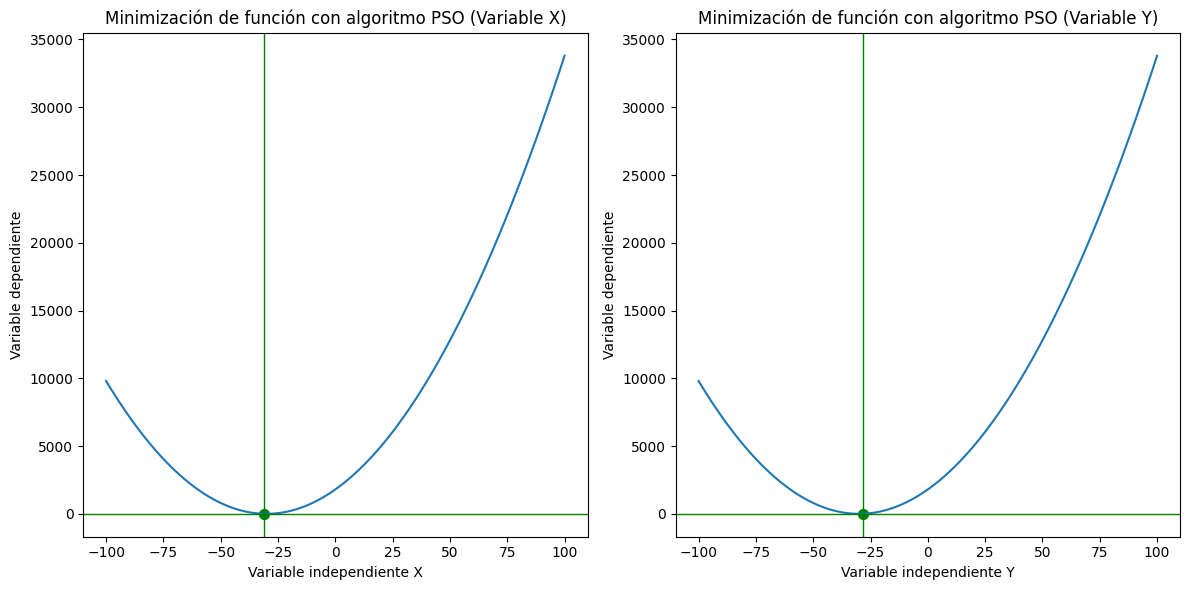

In [484]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

x1 = np.linspace(limite_inf, limite_sup, 100)
x2 = np.linspace(limite_inf, limite_sup, 100)
y = funcion_objetivo(input_a, input_b, x1, x2)

# Variable X
ax[0].plot(x1, y)
ax[0].scatter(solucion_optima[0], valor_optimo, s=50, c='green')
ax[0].axvline(x=solucion_optima[0], c='green', linewidth=1)
ax[0].axhline(y=valor_optimo, c='green', linewidth=1)
ax[0].set_title('Minimización de función con algoritmo PSO (Variable X)')
ax[0].set_xlabel('Variable independiente X')
ax[0].set_ylabel('Variable dependiente')

# Variable Y
ax[1].plot(x2, y)
ax[1].scatter(solucion_optima[1], valor_optimo, s=50, c='green')
ax[1].axvline(x=solucion_optima[1], c='green', linewidth=1)
ax[1].axhline(y=valor_optimo, c='green', linewidth=1)
ax[1].set_title('Minimización de función con algoritmo PSO (Variable Y)')
ax[1].set_xlabel('Variable independiente Y')
ax[1].set_ylabel('Variable dependiente')

plt.tight_layout()
plt.show()

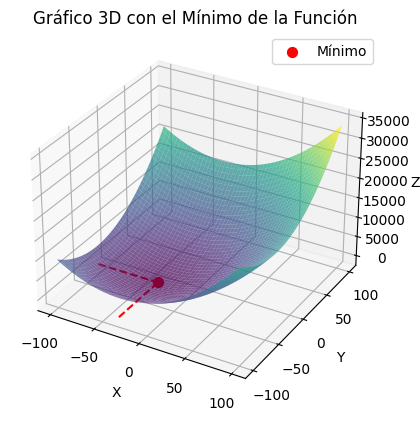

In [485]:
plot_3d(funcion_objetivo, limite_inf, limite_sup, solucion_optima[0], solucion_optima[1])

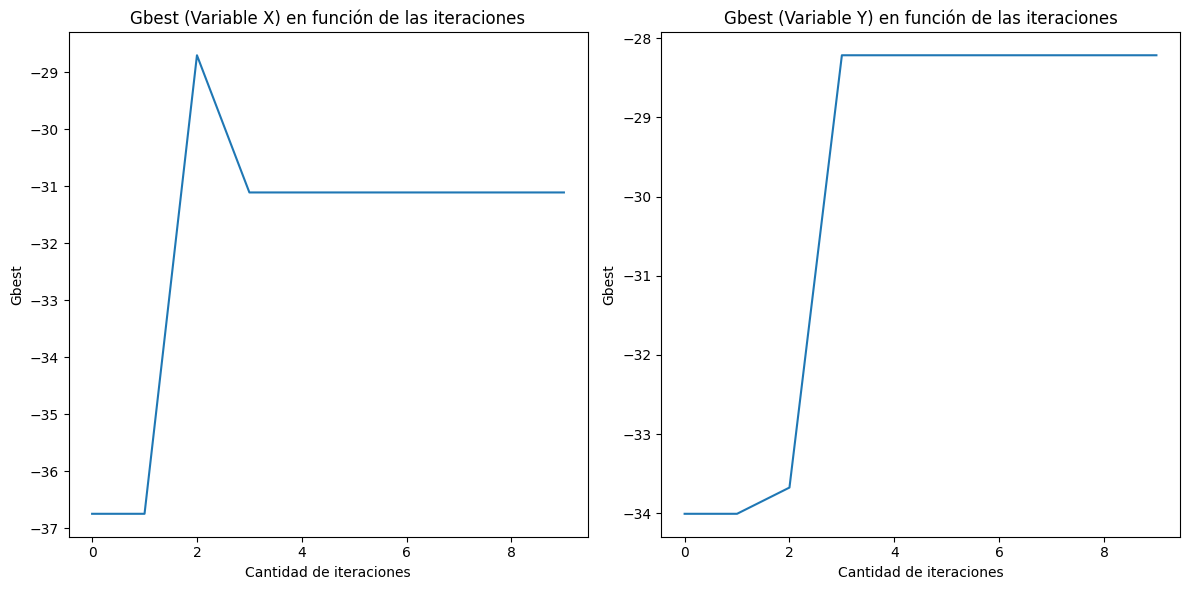

In [486]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

x = np.arange(cantidad_iteraciones)
y1 = np.array(g_bests)[:, 0]
y2 = np.array(g_bests)[:, 1]

# Variable X
ax[0].plot(x, y1)
ax[0].set_title('Gbest (Variable X) en función de las iteraciones')
ax[0].set_xlabel('Cantidad de iteraciones')
ax[0].set_ylabel('Gbest')

# Variable Y
ax[1].plot(x, y2)
ax[1].set_title('Gbest (Variable Y) en función de las iteraciones')
ax[1].set_xlabel('Cantidad de iteraciones')
ax[1].set_ylabel('Gbest')

plt.tight_layout()
plt.show()

#### Con coeficiente de inercia $w=0$

In [487]:
# parametros
num_particulas = 20  # numero de particulas
dim = 2  # dimensiones
cantidad_iteraciones = 10  # maximo numero de iteraciones
c1 = 2.0  # componente cognitivo
c2 = 2.0  # componente social
w = 0  # factor de inercia
limite_inf = -100  # limite inferior de busqueda
limite_sup = 100  # limite superior de busqueda

solucion_optima, valor_optimo, g_bests = solve_PSO(funcion_objetivo, num_particulas, dim, cantidad_iteraciones, c1, c2, w, limite_inf, limite_sup, input_a, input_b)

Iteración 1: Mejor posición global [-28.84073814 -31.50777128], Valor 3.617262272494938
Iteración 2: Mejor posición global [-31.48036611 -29.10389015], Valor 2.994496702309124
Iteración 3: Mejor posición global [-30.43929614 -29.85877656], Valor 0.21292515864086517
Iteración 4: Mejor posición global [-30.38941036 -30.10924178], Valor 0.16357419431261852
Iteración 5: Mejor posición global [-30.22536493 -30.10582213], Valor 0.061987674193137415
Iteración 6: Mejor posición global [-29.97138855 -30.0066988 ], Valor 0.0008634891083914363
Iteración 7: Mejor posición global [-29.99001655 -30.01390895], Valor 0.0002931282459302524
Iteración 8: Mejor posición global [-30.00863388 -30.00257329], Valor 8.116573912683705e-05
Iteración 9: Mejor posición global [-29.99621434 -29.99833131], Valor 1.7115724352406908e-05
Iteración 10: Mejor posición global [-29.99864761 -30.00022896], Valor 1.8813898597703166e-06

Solucion optima (x, y): [-29.99864761 -30.00022896]
Valor optimo: 1.8813898597703166e-06


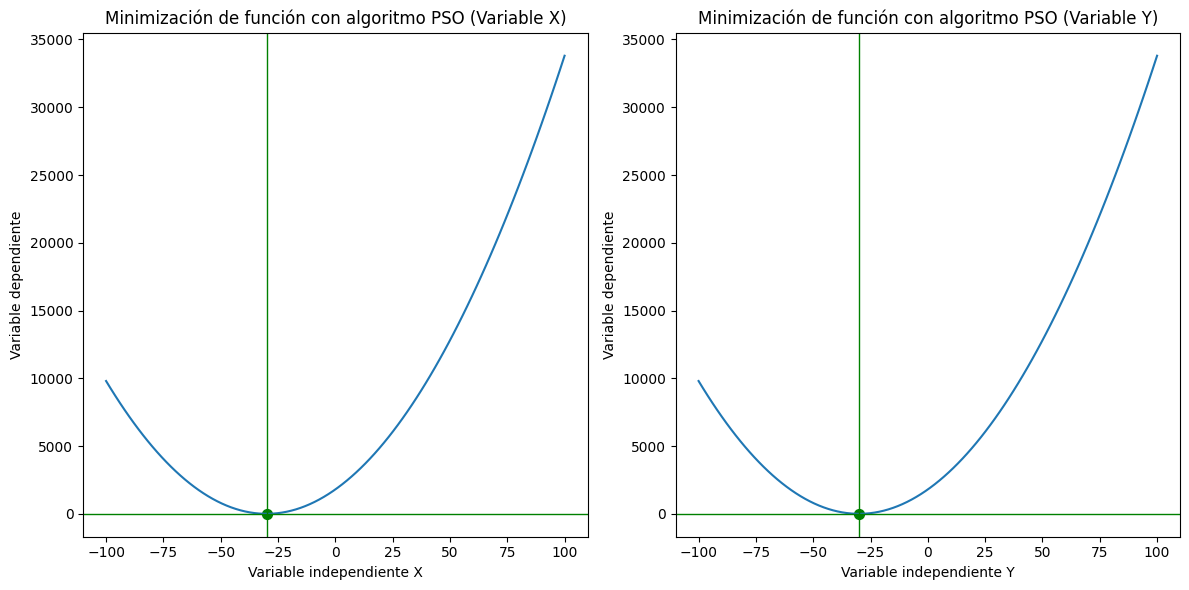

In [488]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

x1 = np.linspace(limite_inf, limite_sup, 100)
x2 = np.linspace(limite_inf, limite_sup, 100)
y = funcion_objetivo(x1, x2, input_a, input_b)

# Variable X
ax[0].plot(x1, y)
ax[0].scatter(solucion_optima[0], valor_optimo, s=50, c='green')
ax[0].axvline(x=solucion_optima[0], c='green', linewidth=1)
ax[0].axhline(y=valor_optimo, c='green', linewidth=1)
ax[0].set_title('Minimización de función con algoritmo PSO (Variable X)')
ax[0].set_xlabel('Variable independiente X')
ax[0].set_ylabel('Variable dependiente')

# Variable Y
ax[1].plot(x2, y)
ax[1].scatter(solucion_optima[1], valor_optimo, s=50, c='green')
ax[1].axvline(x=solucion_optima[1], c='green', linewidth=1)
ax[1].axhline(y=valor_optimo, c='green', linewidth=1)
ax[1].set_title('Minimización de función con algoritmo PSO (Variable Y)')
ax[1].set_xlabel('Variable independiente Y')
ax[1].set_ylabel('Variable dependiente')

plt.tight_layout()
plt.show()

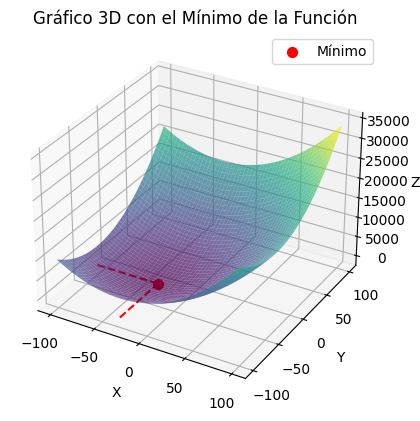

In [489]:
plot_3d(funcion_objetivo, limite_inf, limite_sup, solucion_optima[0], solucion_optima[1])

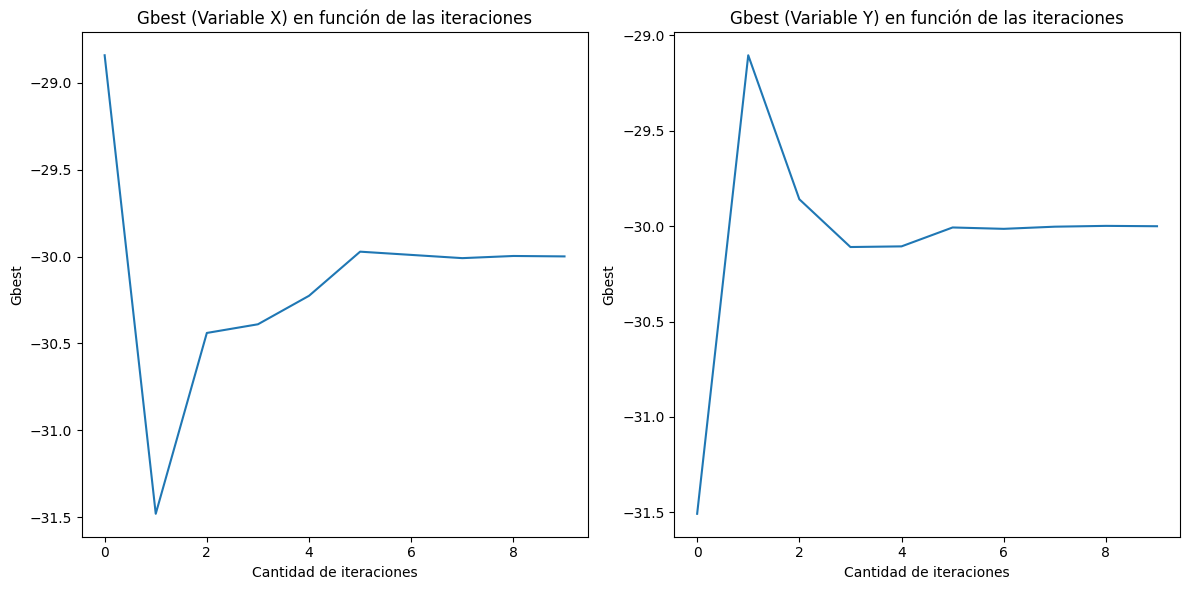

In [490]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

x = np.arange(cantidad_iteraciones)
y1 = np.array(g_bests)[:, 0]
y2 = np.array(g_bests)[:, 1]

# Variable X
ax[0].plot(x, y1)
ax[0].set_title('Gbest (Variable X) en función de las iteraciones')
ax[0].set_xlabel('Cantidad de iteraciones')
ax[0].set_ylabel('Gbest')

# Variable Y
ax[1].plot(x, y2)
ax[1].set_title('Gbest (Variable Y) en función de las iteraciones')
ax[1].set_xlabel('Cantidad de iteraciones')
ax[1].set_ylabel('Gbest')

plt.tight_layout()
plt.show()

Los valores halaldos fueros muy similares, tanto con $w=0.7$ como con $w=0$. Teóricamente, el valor de coeficiente de inercia favorece una exploración más local cuanto menor sea su valor, mientrs que favorecerá una exploración más global cuanto mayor sea

#### Con PySwarm

In [491]:
from pyswarm import pso

# funcion objetivo hiperboloide eliptico
def funcion_objetivo(x):
    return (x[0] - input_a) ** 2 + (x[1] + input_b) ** 2

In [492]:
# parametros
num_particulas = 20  # numero de particulas
dim = 2  # dimensiones
cantidad_iteraciones = 10  # maximo numero de iteraciones
c1 = 2.0  # componente cognitivo
c2 = 2.0  # componente social
w = 0.7  # factor de inercia

lb = [-100, -100]  # limite inf
ub = [100, 100]  # limite sup

# Llamada a la función pso
solucion_optima, valor_optimo = pso(
    funcion_objetivo,
    lb,
    ub,
    swarmsize=num_particulas,
    maxiter=cantidad_iteraciones,
    omega=w,
    phip=c1,
    phig=c2,
    debug=False)

# Resultados
print("\nSolución óptima (x, y):", solucion_optima)
print("Valor óptimo:", valor_optimo)

Stopping search: maximum iterations reached --> 10

Solución óptima (x, y): [-30.77303178 -26.50588453]
Valor óptimo: 12.806421087006138


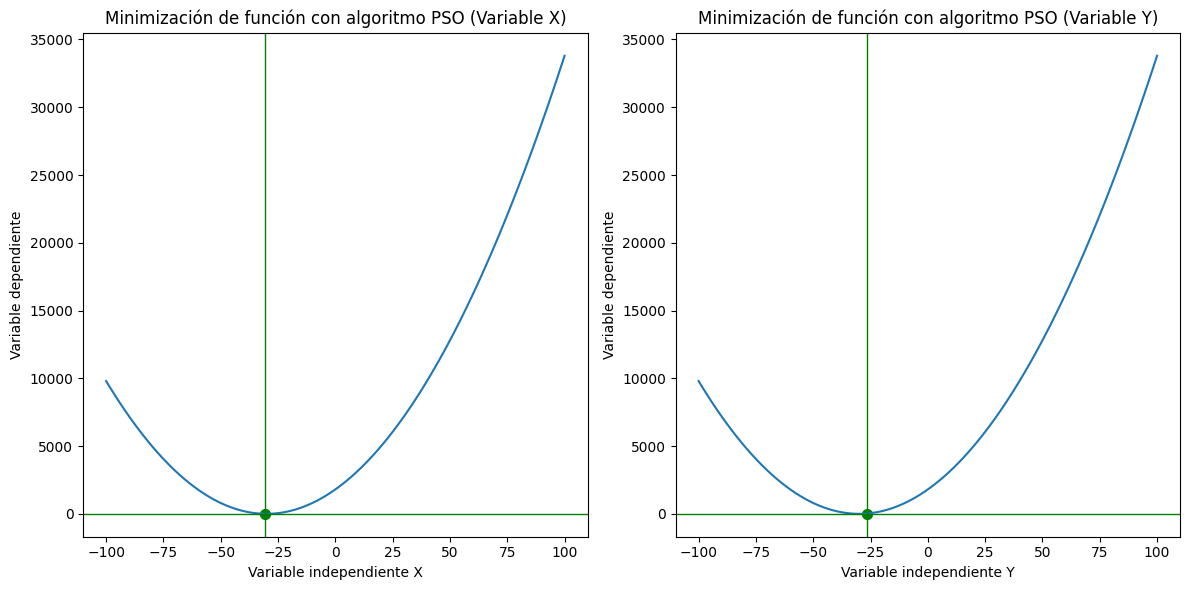

In [493]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

x1 = np.linspace(limite_inf, limite_sup, 100)
x2 = np.linspace(limite_inf, limite_sup, 100)
y = [funcion_objetivo(x) for x in np.hstack((x1.reshape(-1,1), x2.reshape(-1,1)))]

# Variable X
ax[0].plot(x1, y)
ax[0].scatter(solucion_optima[0], valor_optimo, s=50, c='green')
ax[0].axvline(x=solucion_optima[0], c='green', linewidth=1)
ax[0].axhline(y=valor_optimo, c='green', linewidth=1)
ax[0].set_title('Minimización de función con algoritmo PSO (Variable X)')
ax[0].set_xlabel('Variable independiente X')
ax[0].set_ylabel('Variable dependiente')

# Variable Y
ax[1].plot(x2, y)
ax[1].scatter(solucion_optima[1], valor_optimo, s=50, c='green')
ax[1].axvline(x=solucion_optima[1], c='green', linewidth=1)
ax[1].axhline(y=valor_optimo, c='green', linewidth=1)
ax[1].set_title('Minimización de función con algoritmo PSO (Variable Y)')
ax[1].set_xlabel('Variable independiente Y')
ax[1].set_ylabel('Variable dependiente')

plt.tight_layout()
plt.show()

El algoritmo PSO de PySwarm es mucho más eficiente. La velocidad de cómputo fue notoria. Además, tiene más hiperparámetros y configuraciones para ajustar. En términos de soluciones halladas, ambos dieron similar. De todas maneras, el ejecicio de optimización fue muy sencillo para que PSO de PySwarm se luzca más.

### EJERCICIO 4

Mediante PSO es posible resolver en forma aproximada un sistema de n ecuaciones con $n$ incógnitas clásico del tipo:

\begin{equation*}
\begin{cases}
f_1(x_1, x_2, \dots, x_n)=0 \\
f_2(x_1, x_2, \dots, x_n)=0 \\
\vdots \\
f_n(x_1, x_2, \dots, x_n)=0 \\
\end{cases}
\end{equation*}

Por ejemplo, el siguiente es un sistema de 2 ecuaciones con 2 incógnitas $x_1$ y $x_2$ que puede ser resuelto con PSO:

\begin{equation*}
\begin{cases}
3x_1+2x_2=9 \\
x_1-5x_2=4
\end{cases}
\end{equation*}

Utilizando la biblioteca pyswarm:
* Escribir un algoritmo PSO con parámetros a elección (c1, c2, w, número de partículas, máximo número de iteraciones) que encuentre $x_1$ y $x_2$ para el sistema de ecuaciones anterior (3). Transcribir el código fuente.
* Transcribir los valores de $x_1$ y $x_2$ encontrados por el algoritmo.
* Indicar la URL del repositorio en donde se encuentra el algoritmo PSO.
* Realizar observaciones/comentarios/conclusiones sobre: 
    *  (i) ¿Cómo eligió los limites superior e inferior de $x_1$ y $x_2$?. 
    *  (ii) ¿PSO puede resolver un sistema de $n$ ecuaciones con $n$ incógnitas no lineal?. Demostrar. 
    * (iii) ¿Cómo logró resolver el ejercicio?. 
    * (iv) ¿Los resultados obtenidos guardan relación directa con los valores de los parámetros elegidos?. Demostrar.

Lo que se va a hacer es utilizar la librería Optuna para realizar una búsqueda de hiperparámetros bayesiana. El objetivo será minimizar la función de suma de errores cuadráticos medios y quedarme con esos hiperparámetros.

In [494]:
import optuna
import contextlib # Esto es para evitar los prints excesivos
import os

In [495]:
# Función objetivo
def funcion_objetivo(x):
    x1, x2 = x
    eq1 = (3 * x1 + 2 * x2 - 9) ** 2  # error cuadrático de la primera ecuación
    eq2 = (x1 - 5 * x2 - 4) ** 2  # error cuadrático de la segunda ecuación
    return eq1 + eq2

In [496]:
# Definir la función que será optimizada por Optuna
def optimizacion(trial):
    # Sugerir valores para los hiperparámetros
    num_particulas = trial.suggest_int('num_particulas', 10, 100)
    cant_iteraciones = trial.suggest_int('cant_iteraciones', 50, 300)
    w = trial.suggest_uniform('w', 0.1, 0.9)
    c1 = trial.suggest_uniform('c1', 0.5, 3.0)
    c2 = trial.suggest_uniform('c2', 0.5, 3.0)
    lb = trial.suggest_uniform('lb', -100, 0)
    ub = trial.suggest_uniform('ub', 0, 100)

    # Límites para x1 y x2
    lb_ = [lb, lb]
    ub_ = [ub, ub]

    # Ejecutar PSO
    with open(os.devnull, 'w') as fnull:
        with contextlib.redirect_stdout(fnull):
            best_position, best_value = pso(
                funcion_objetivo,
                lb=lb_,
                ub=ub_,
                swarmsize=num_particulas,
                maxiter=cant_iteraciones,
                omega=w,
                phip=c1,
                phig=c2
            )

    # El objetivo de la optimización es minimizar el valor de la función objetivo
    return best_value

# Crear un estudio de Optuna y optimizar
study = optuna.create_study(direction='minimize')
study.optimize(optimizacion, n_trials=200)

# Imprimir los resultados
print("Mejor valor objetivo:", study.best_value)
print("Mejores hiperparámetros:", study.best_params)

[I 2024-08-10 12:41:21,133] A new study created in memory with name: no-name-d252b2dd-16a2-4e86-845a-79acadd584a2
C:\Users\Leandro\AppData\Local\Temp\ipykernel_12904\1884802977.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  w = trial.suggest_uniform('w', 0.1, 0.9)
C:\Users\Leandro\AppData\Local\Temp\ipykernel_12904\1884802977.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  c1 = trial.suggest_uniform('c1', 0.5, 3.0)
C:\Users\Leandro\AppData\Local\Temp\ipykernel_12904\1884802977.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

Mejor valor objetivo: 1.0430942124367217e-11
Mejores hiperparámetros: {'num_particulas': 39, 'cant_iteraciones': 289, 'w': 0.21841625601899686, 'c1': 2.9018986677091667, 'c2': 1.4722160130770745, 'lb': -83.86920697758734, 'ub': 9.596565052531925}


In [497]:
# Mejores hiperparámetros
study.best_params

{'num_particulas': 39,
 'cant_iteraciones': 289,
 'w': 0.21841625601899686,
 'c1': 2.9018986677091667,
 'c2': 1.4722160130770745,
 'lb': -83.86920697758734,
 'ub': 9.596565052531925}

In [498]:
# Con los mejores hiperparámetros hallados, resuelvo con PSO
best_position, best_value = pso(
                funcion_objetivo,
                lb=[study.best_params['lb']]*2,
                ub=[study.best_params['ub']]*2,
                swarmsize=study.best_params['num_particulas'],
                maxiter=study.best_params['cant_iteraciones'],
                omega=study.best_params['w'],
                phip=study.best_params['c1'],
                phig=study.best_params['c2'],
                debug=False)

Stopping search: Swarm best objective change less than 1e-08


In [499]:
# Verifico las igualdades de mis dos ecuaciones
x_1 = best_position[0]
x_2 = best_position[1]

print(np.round(3*x_1+2*x_2, 3) == 9)
print(np.round(x_1-5*x_2, 3) == 4)

True
False


El algoritmo PSO puede resolver un sistema de $n$ ecuaciones no lineales con $n$ incógnitas. Esto se logra formulando el problema como una minimización de la suma de los errores cuadráticos para cada una de las ecuaciones. La función objetivo suma los cuadrados de las diferencias de cada ecuación con respecto a cero. Al minimizar esta función, se busca encontrar un conjunto de valores para $x_1, x_2, \dots, x_n$ que hagan que todas las ecuaciones se acerquen a cero simultáneamente.

Los resultados obtenidos mediante PSO están fuertemente influenciados por los valores de los hiperparámetros seleccionados, como el número de partículas, el número de iteraciones, el factor de inercia $w$, el coeficiente $c1$ y el coeficiente $c2$.

* Número de partículas: Un número mayor de partículas puede explorar un espacio de soluciones más amplio, lo que potencialmente puede llevar a una mejor solución. Sin embargo, un número excesivo de partículas aumenta el costo computacional.
* Número de iteraciones: Un mayor número de iteraciones permite que las partículas tengan más tiempo para converger hacia la solución óptima, pero más iteraciones también incrementan el tiempo de cómputo.
* Factor de inercia $w$: Controla la tendencia de las partículas a mantener su velocidad. Un valor alto de $w$ fomenta la exploración global, mientras que un valor bajo favorece la explotación local.
* Coeficiente $c1$: Representa la confianza en la experiencia propia de la partícula. Un valor alto de $c1$ hace que las partículas se dirijan hacia sus mejores posiciones encontradas, aumentando la explotación.
* Coeficiente $c2$: Representa la confianza en la experiencia del enjambre. Un valor alto de hace que las partículas tiendan a moverse hacia las mejores posiciones encontradas por el enjambre, promoviendo la explotación.

In [500]:
# CÓDIGO PARA EXPORTAR NOTEBOOK
from nbconvert import PDFExporter
import nbformat

# NOMBRE DEL NOTEBOOK
notebook_filename = "C:/Users/Leandro/Desktop/IoT/5_Bimestre/Algoritmos genéticos/TP2/TP2.ipynb"

# LEO EL NOTEBOOK
with open(notebook_filename, 'r', encoding='utf-8') as nb_file:
    notebook = nbformat.read(nb_file, as_version=4)

# CONFIGURO EL EXPORTADOR PDF
pdf_exporter = PDFExporter()

# CONVIERTO A PDF
pdf_data, _ = pdf_exporter.from_notebook_node(notebook)

# GUARDO EL PDF
pdf_filename = "C:/Users/Leandro/Desktop/IoT/5_Bimestre/Algoritmos genéticos/TP2/TP2.pdf"
with open(pdf_filename, 'wb') as pdf_file:
    pdf_file.write(pdf_data)